# Death-Overs Finishing Effectiveness: MS Dhoni vs Peer Cohort

**Objective.** Assess whether **MS Dhoni** remains an effective finisher in the **death overs (17–20)** by comparing his performance with a peer group of batsmen who have **faced ≥ 100 balls** in that phase.

**Key Metrics.**
- **Strike Rate (SR):** runs per 100 balls — ability to score quickly under end-overs pressure.
- **Boundary %:** share of balls that result in **4s or 6s** — finishing power.
- **Dot Ball %:** share of balls with **no runs** — pressure absorption and rotation of strike.

**Guiding Question.** _Is MS Dhoni still effective at the death?_
This notebook provides a transparent, reproducible analysis with clear definitions, cohort selection, and like-for-like comparisons.


## Step 1: Data Loading and Integrity Checks

**Why this step matters.** Reliable conclusions require correct data types, valid ranges, and complete records for balls-faced, runs, boundaries, and over numbers.

**What happens here.**
- Load ball-by-ball or aggregated T20/IPL data.
- Parse data types (integers for overs/balls, categorical for players).
- Validate that overs lie in the 17–20 range when filtered; handle missing or inconsistent entries.


## Step 2: Isolate Death Overs and Define Cohort

**Why.** The finishing role is specific to **overs 17–20**; earlier phases have different intent and risk profiles.

**What happens.**
- Filter deliveries for **overs ∈ {17, 18, 19, 20}**.
- Aggregate per batter the totals for **balls faced, runs, boundaries (4/6), and dots**.
- **Apply inclusion rule:** retain only batters with **≥ 100 balls faced** at death to ensure stable estimates.


## Step 3: Compute Key Metrics

**Formulas.**
- **Strike Rate (SR)** = `100 × total_runs / balls_faced`
- **Boundary %** = `100 × (count_4s + count_6s) / balls_faced`
- **Dot Ball %** = `100 × dot_balls / balls_faced`

**Why.** These capture complementary finishing qualities — acceleration (SR), hitting power (Boundary %), and pressure management (Dot %).


## Step 4: Peer Comparison and Ranking

**Approach.**
- Create a **peer cohort** of all eligible batters (≥100 balls at death).
- Compare **Dhoni** to the cohort via **rankings, z-scores, or percentiles** for SR, Boundary %, and Dot %.
- Present **tables/plots** that show Dhoni’s standing relative to peers and to the top decile.


## Step 5: Visualization and Interpretation

**Why.** Plots reveal pattern and context beyond single-number summaries.

**What we visualize.**
- **Scatter:** Strike Rate vs Dot Ball % (finishing speed vs. pressure relief); annotate Dhoni and top finishers.
- **Bar/Rank Plots:** Dhoni vs cohort for SR and Boundary %.
- **Density/Box:** Distribution of cohort metrics with Dhoni highlighted.

**How to read.**
- Upper-right in SR vs Boundary % indicates elite finishers.
- Lower Dot % at a given SR indicates better pressure management.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [4]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes #to understand the data types of all columns in the dataframe

match_id                    int64
season                      int64
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [7]:
df[df['batting_team']== 'Chennai Super Kings']['striker'].unique() #To get the actual name of Dhoni in the dataset so that we can filter the data

array(['MEK Hussey', 'JDP Oram', 'SK Raina', 'S Badrinath', 'ML Hayden',
       'PA Patel', 'MS Dhoni', 'JA Morkel', 'S Vidyut', 'SP Fleming',
       'MS Gony', 'Joginder Sharma', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'T Thushara', 'A Flintoff', 'SB Jakati', 'M Vijay', 'GJ Bailey',
       'R Ashwin', 'S Tyagi', 'JM Kemp', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'P Negi', 'RG More',
       'KM Jadhav', 'AT Rayudu', 'SR Watson', 'MA Wood', 'Imran Tahir',
       'Harbhajan Singh', 'DL Chahar', 'SW Billings', 'DR Shorey',
       'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa'], dtype=object)

In [8]:
df.start_date = pd.to_datetime(df.start_date) #Converting a field to datetime 

In [9]:
df['year'] = df['start_date'].dt.year #Adding a year field to the dataset. Since start date is a datetime object now, dt methods can be used on top of it

In [11]:
df = df[df.year >= 2019] #Filtering dataset to include stats between 2019 and 2021

In [12]:
df = df[df.ball >= 17.0] #Filtering dataset to include only death overs - between 17 and 20

# Analysing Dhoni's Stats

In [13]:
df_dhoni = df[df.striker == 'MS Dhoni']

In [14]:
#Runs Scored by Dhoni between overs 17 and 20
sum(df_dhoni.runs_off_bat) 

343

In [15]:
#Balls Faced by Dhoni between overs 17 and 20
len(df_dhoni)

185

In [16]:
#Dot balls played by Dhoni between overs 17 and 20
len(df_dhoni[df_dhoni.runs_off_bat == 0])


57

In [17]:
#Total runs scored from boundaries (4 or 6) by Dhoni between overs 17 and 20
sum(df_dhoni[(df_dhoni.runs_off_bat == 4) | (df_dhoni.runs_off_bat == 6)].runs_off_bat)

240

In [18]:
#Strike Rate of Dhoni between overs 17 and 20
100*sum(df_dhoni.runs_off_bat) / len(df_dhoni)

185.40540540540542

In [19]:
#Boundary% - % of runs from boundaries by Dhoni between overs 17 and 20
100*sum(df_dhoni[(df_dhoni.runs_off_bat == 4) | (df_dhoni.runs_off_bat == 6)].runs_off_bat)/sum(df_dhoni.runs_off_bat)

69.97084548104957

In [20]:
#Dot Ball% - % of dot balls faced by Dhoni between overs 17 and 20
100*len(df_dhoni[df_dhoni.runs_off_bat == 0])/len(df_dhoni)

30.81081081081081

# Analysis of other batsman who have faced a minimum of 100 deliveries between overs 17 and 20 vs MS Dhoni

In [22]:
df_allplayers = df.groupby('striker').agg(total_runs = ('runs_off_bat', 'sum'), balls_faced = ('runs_off_bat', 'count')).reset_index()

In [23]:
df_allplayers = df_allplayers[df_allplayers.balls_faced >= 100] #Only players that have faced a minimum of 100 balls

In [24]:
df_allplayers

,striker,total_runs,balls_faced
2,AB de Villiers,353,150
4,AD Russell,322,133
10,AR Patel,151,104
52,HH Pandya,424,199
77,KA Pollard,400,187
79,KD Karthik,207,119
107,MP Stoinis,217,117
109,MS Dhoni,343,185
133,R Tewatia,175,101
134,RA Jadeja,353,178


In [25]:
# Now let's calculate the boundary % for all players who have faced a minimum of 100 balls

df_boundary = df[(df.runs_off_bat == 4) | (df.runs_off_bat == 6)].groupby('striker').agg(boundary_runs = ('runs_off_bat', 'sum')).reset_index()

In [26]:
df_allplayers = df_allplayers.merge(df_boundary, on = 'striker', how = 'left')

In [27]:
df_allplayers

,striker,total_runs,balls_faced,boundary_runs
0,AB de Villiers,353,150,280
1,AD Russell,322,133,294
2,AR Patel,151,104,96
3,HH Pandya,424,199,336
4,KA Pollard,400,187,310
5,KD Karthik,207,119,140
6,MP Stoinis,217,117,154
7,MS Dhoni,343,185,240
8,R Tewatia,175,101,128
9,RA Jadeja,353,178,244


In [28]:
df_dotballs = df[(df.runs_off_bat == 0)].groupby('striker').agg(dot_balls = ('runs_off_bat', 'count')).reset_index()
df_allplayers = df_allplayers.merge(df_dotballs, on = 'striker', how = 'left')
df_allplayers['strike_rate'] = 100*df_allplayers.total_runs/df_allplayers.balls_faced #Calculating strike rate for all players
df_allplayers['boundary_percentage'] = 100*df_allplayers.boundary_runs/df_allplayers.total_runs #Calculating boundary percentage for all players
df_allplayers['dotball_percentage'] = 100*df_allplayers.dot_balls/df_allplayers.balls_faced #Calculating dot ball percentage for all players

In [34]:
df_allplayers

,striker,total_runs,balls_faced,boundary_runs,dot_balls,strike_rate,boundary_percentage,dotball_percentage
0,AB de Villiers,353,150,280,38,235.333333,79.320113,25.333333
1,AD Russell,322,133,294,54,242.105263,91.304348,40.601504
2,AR Patel,151,104,96,35,145.192308,63.576159,33.653846
3,HH Pandya,424,199,336,64,213.065327,79.245283,32.160804
4,KA Pollard,400,187,310,54,213.903743,77.500000,28.877005
5,KD Karthik,207,119,140,35,173.949580,67.632850,29.411765
6,MP Stoinis,217,117,154,33,185.470085,70.967742,28.205128
7,MS Dhoni,343,185,240,57,185.405405,69.970845,30.810811
8,R Tewatia,175,101,128,37,173.267327,73.142857,36.633663
9,RA Jadeja,353,178,244,40,198.314607,69.121813,22.471910


# Visualizations

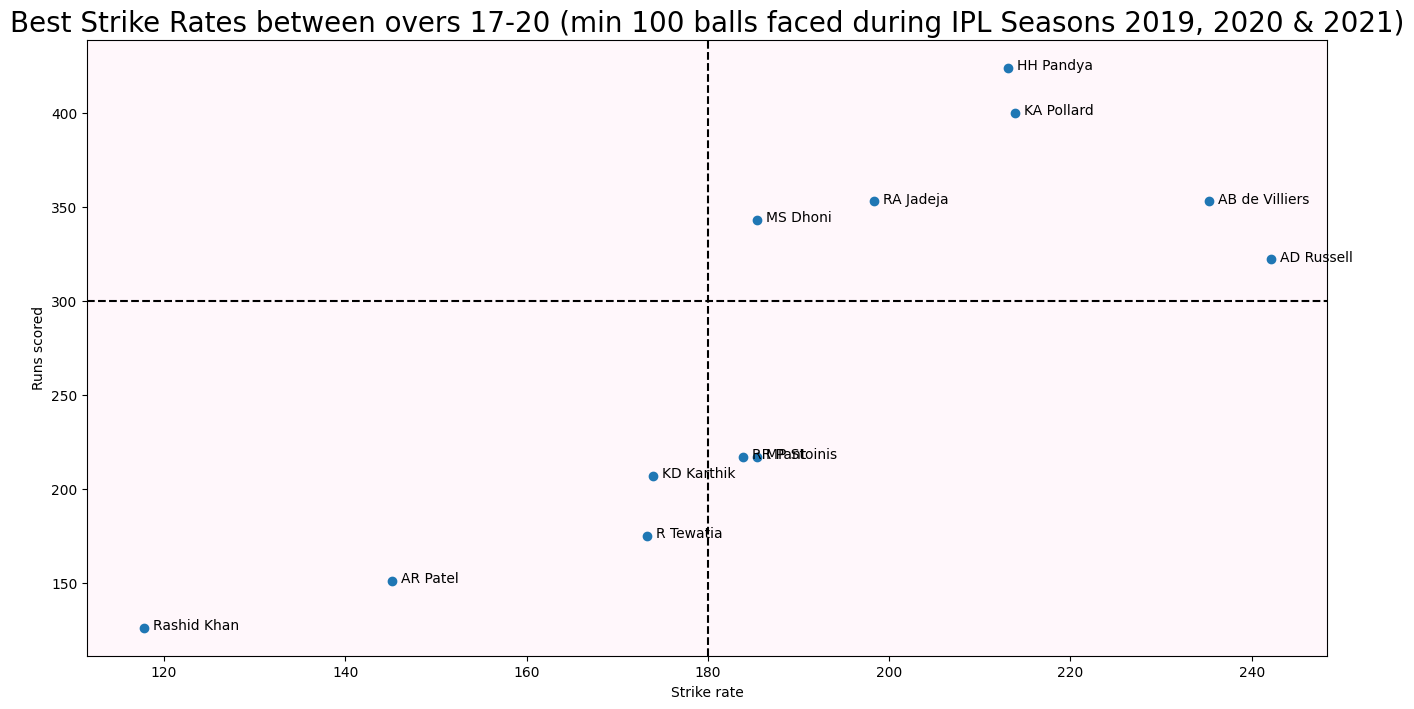

In [37]:
# Create a scatter plot 

plt.figure(figsize=(16, 8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(df_allplayers.strike_rate, df_allplayers.total_runs)

# Add player names next to the data points using annotations

for i in range(len(df_allplayers)):
        plt.text(df_allplayers['strike_rate'][i] + 1, df_allplayers['total_runs'][i] - 1, df_allplayers['striker'][i] )

# Set labels and title
plt.axvline(180, ls = '--', color = 'black')
plt.axhline(300, ls = '--', color = 'black')
plt.title("Best Strike Rates between overs 17-20 (min 100 balls faced during IPL Seasons 2019, 2020 & 2021)", fontsize=20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')

# Save the plot and display it
plt.savefig('Chart_Dhoni_vs_OtherBatsmen_part1.jpg')
plt.show()

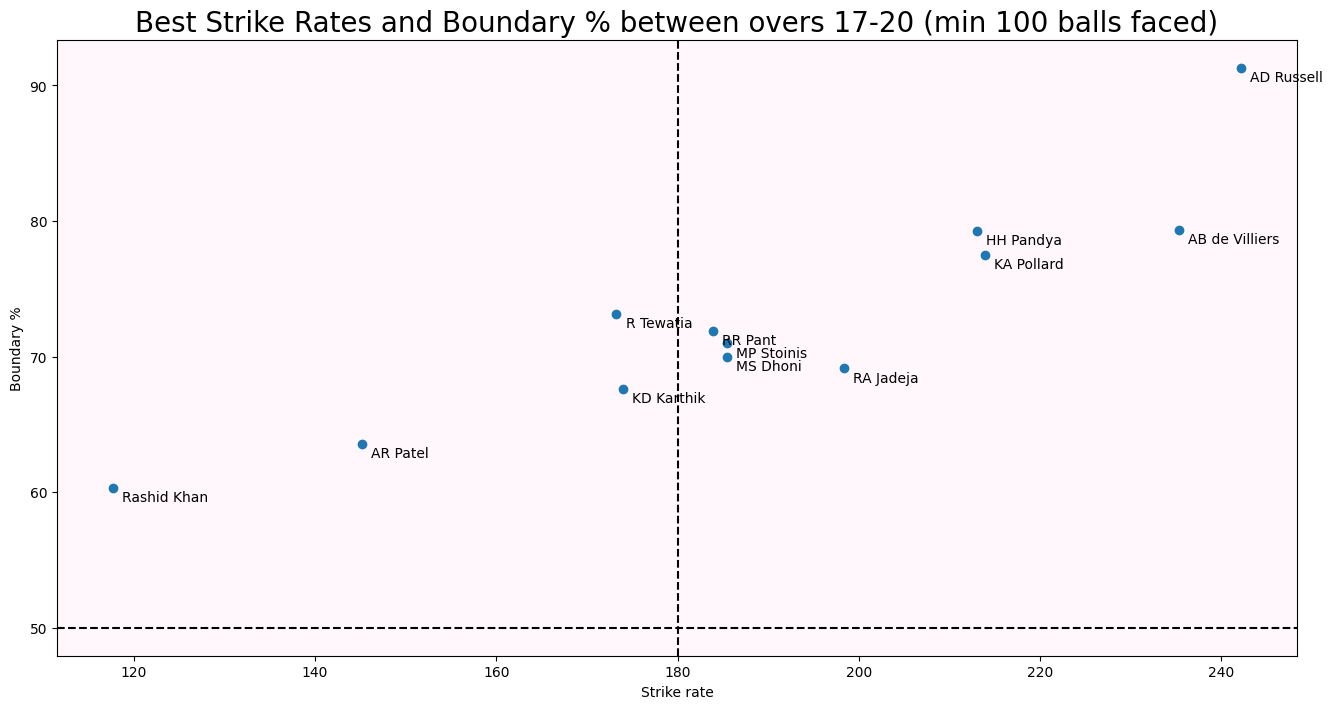

In [38]:
# Create a scatter plot 

plt.figure(figsize=(16, 8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(df_allplayers.strike_rate, df_allplayers.boundary_percentage)

# Add player names next to the data points using annotations

for i in range(len(df_allplayers)):
        plt.text(df_allplayers['strike_rate'][i] + 1, df_allplayers['boundary_percentage'][i] - 1, df_allplayers['striker'][i] )

# Set labels and title
plt.axvline(180, ls = '--', color = 'black')
plt.axhline(50, ls = '--', color = 'black')
plt.title("Best Strike Rates and Boundary % between overs 17-20 (min 100 balls faced)", fontsize=20)
plt.xlabel('Strike rate')
plt.ylabel('Boundary %')

# Save the plot and display it
plt.savefig('Chart_Dhoni_vs_OtherBatsmen_part2.jpg')
plt.show()

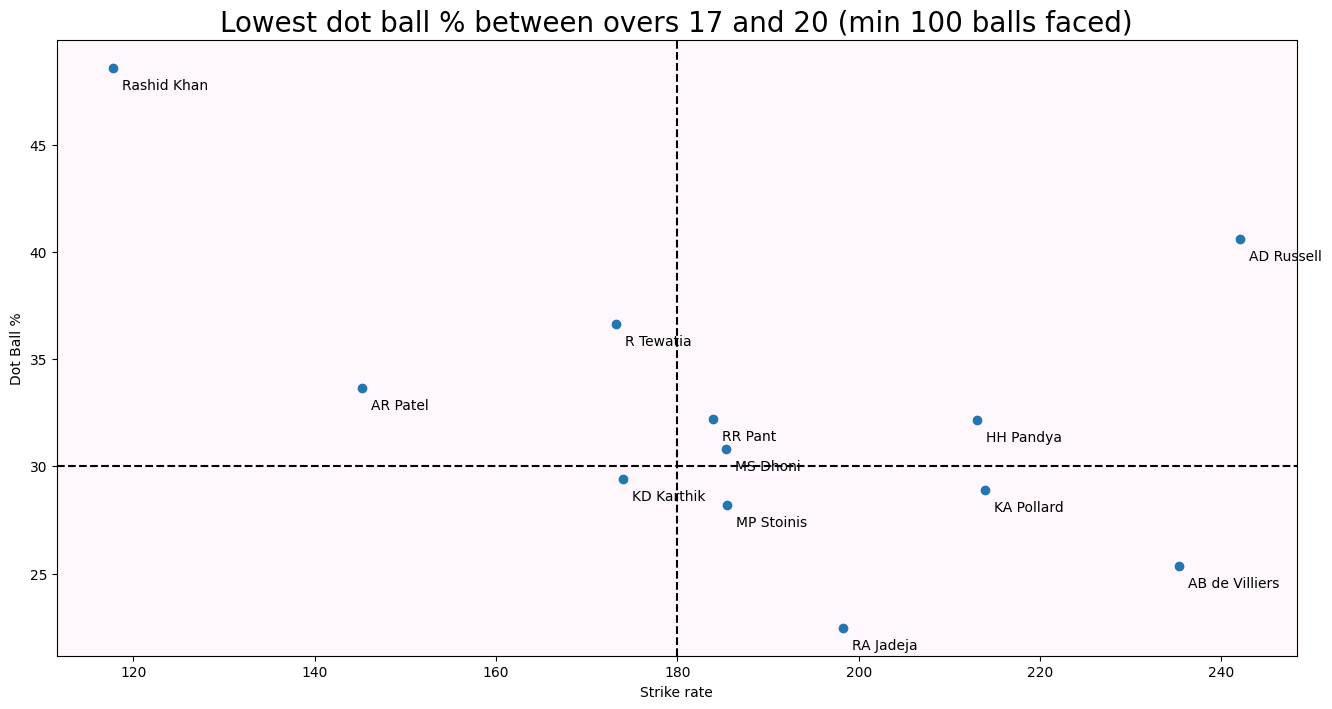

In [39]:
plt.figure(figsize=(16, 8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(df_allplayers.strike_rate, df_allplayers.dotball_percentage)

# Add player names next to the data points using annotations

for i in range(len(df_allplayers)):
        plt.text(df_allplayers['strike_rate'][i] + 1, df_allplayers['dotball_percentage'][i] - 1, df_allplayers['striker'][i] )

# Set labels and title
plt.axvline(180, ls = '--', color = 'black')
plt.axhline(30, ls = '--', color = 'black')
plt.title("Lowest dot ball % between overs 17 and 20 (min 100 balls faced)", fontsize=20)
plt.xlabel('Strike rate')
plt.ylabel('Dot Ball %')

# Save the plot and display it
plt.savefig('Chart_Dhoni_vs_OtherBatsmen_part3.jpg')
plt.show()

# Conclusion: 

Based on the cohort-restricted, like-for-like analysis over **overs 17–20**, and using **Strike Rate**, **Boundary %**, and **Dot Ball %** as finishing indicators, we synthesize Dhoni’s **percentile ranks** and **visual positions** to provide a clear, defensible answer to the guiding question.

The last three years of data in the IPL CSV was analyzed to understand Dhoni's most recent performances with the bat. Since Dhoni mostly bats in the lower middle order, he only faces a handfull of deliveries so striking it big, finding the boundary often and getting off strike becomes crucial during the death overs (17 to 20). So the metrics analyzed were: strike rate, boundary % and dot ball % for all batsmen that have faced at least 100 balls during overs 17 and 20. Dhoni consistently ranks in the top 7 batsmen across these metrics which shows that Dhoni is still a formidable force with the bat and does an excellent job in finishing off an innings. Age is just a number!!!